In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [29]:
# data_type = "train"
# month = "07"
# category = "잔액정보"

# local
root_path = '../../data'

# colab
# root_path = '/content/drive/MyDrive/12조 파이널프로젝트/data'

#drive_folder = f'{root_path}/스탯티즈_Raw_data/'

In [31]:
df1 = pd.read_csv(f'{root_path}/KBO FA 투수 [2013-2024]_최종_전처리_ver03.csv', encoding='utf-8')

In [21]:
# # 🔎 데이터 타입
# print("▶ df1 dtypes\n", df1.dtypes)

In [19]:
# # 🔎 빈 문자열 확인
# print("\n🔍 [빈 문자열 개수]")
# print("▶ df1 빈 문자열:\n", (df1 == '').sum())

In [15]:
# df1.describe().T[['min', 'max']].sort_values('min')

In [ ]:
# # 유일값 개수가 1개 이하인 컬럼 찾기 (전부 0이거나 전부 NaN)
# constant_cols = [col for col in df1.columns if df1[col].nunique(dropna=False) <= 1]

# print("🧊 모든 값이 동일한 컬럼 (전부 0이거나 한 값만 있음):")
# print(constant_cols)

## 이닝수 VS 계약 총액

In [42]:
df1['이닝수'].value_counts()

이닝수
48.0     5
62.2     5
58.1     4
49.1     4
69.0     4
        ..
14.0     1
41.0     1
18.1     1
153.2    1
111.2    1
Name: count, Length: 241, dtype: int64

In [80]:
# 1. 선수별 평균 이닝수 계산
inning_mean = df1.groupby('선수명')['이닝수'].mean().reset_index()
inning_mean.rename(columns={'이닝수': '평균이닝수'}, inplace=True)

# 2. FA 계약 연수가 있는 행만 필터링 (계약금 의미 있는 행)
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합 (선수명 기준)
result = pd.merge(fa_contract, inning_mean, on='선수명', how='left')

# 4. 중복 제거 (같은 선수가 여러 계약 정보가 있을 수 있으므로 한 번만)
result = result.drop_duplicates(subset='선수명')

# 5. 결과 확인
print(result.head())

   선수명  FA 계약 총액  평균이닝수
0  강영식  170000.0  44.12
1  고효준   12000.0  39.08
2  권오준   60000.0  34.84
3   권혁  320000.0  55.90
4  금민철   70000.0  63.04


- 산점도

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2021478260.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


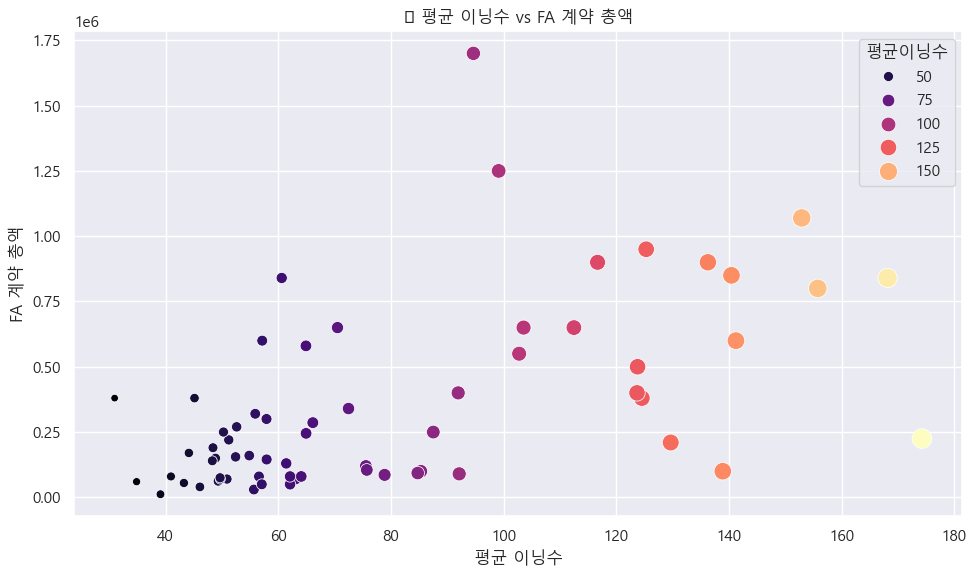

In [102]:
# 시각화: 평균 이닝수 vs FA 계약 총액
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='평균이닝수', y='FA 계약 총액(억)', size='평균이닝수', hue='평균이닝수', palette='magma', sizes=(30, 200))
plt.title('📊 평균 이닝수 vs FA 계약 총액')
plt.xlabel('평균 이닝수')
plt.ylabel('FA 계약 총액')
plt.grid(True)
plt.tight_layout()
plt.show()

- 막대 그래프

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2127753052.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result.groupby('이닝수구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2127753052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='이닝수구간', y='FA 계약 총액', palette='flare')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2127753052.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Ma

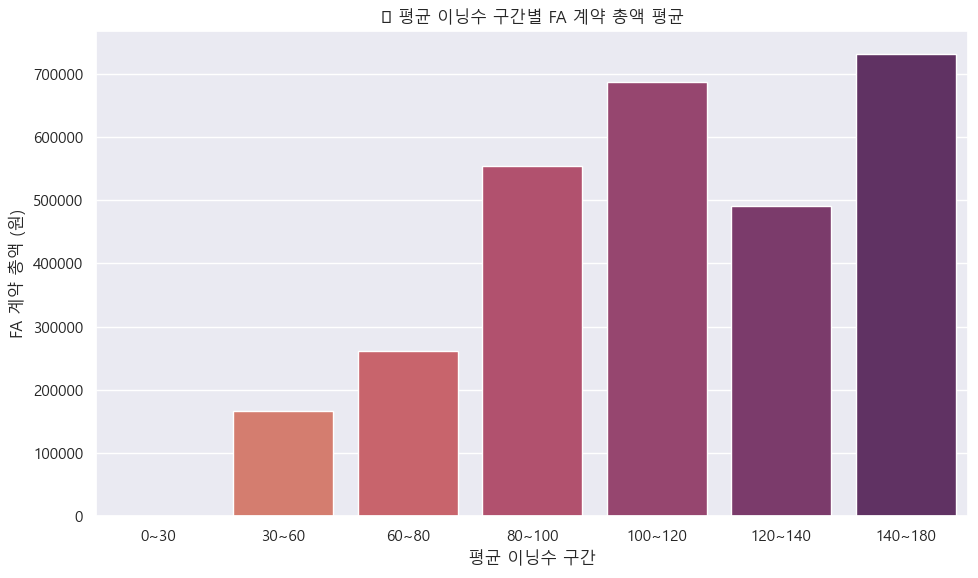

In [108]:
# 이닝수 구간 설정 (구간은 원하면 자유롭게 바꿔도 됨)
bins = [0, 30, 60, 80, 100, 120, 140, 180]
labels = ['0~30', '30~60', '60~80', '80~100', '100~120', '120~140', '140~180']
result['이닝수구간'] = pd.cut(result['평균이닝수'], bins=bins, labels=labels, right=False)

# 이닝수 구간별 계약금 평균 계산
grouped = result.groupby('이닝수구간')['FA 계약 총액'].mean().reset_index()

# 막대그래프 시각화 (단위 변환 없이 원 그대로)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='이닝수구간', y='FA 계약 총액', palette='flare')
plt.title('📊 평균 이닝수 구간별 FA 계약 총액 평균')
plt.xlabel('평균 이닝수 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [110]:
# 각 이닝수 구간별 선수 수 확인
result['이닝수구간'].value_counts().sort_index()

이닝수구간
0~30        0
30~60      27
60~80      14
80~100      7
100~120     4
120~140     7
140~180     6
Name: count, dtype: int64

In [106]:
# 상관계수 계산
correlation = result[['평균이닝수', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 이닝수와 계약 총액의 상관계수: {correlation:.3f}')

📌 평균 이닝수와 계약 총액의 상관계수: 0.551


## ERA VS 계약 총액

In [114]:
# 1. 선수별 평균 ERA 계산
era_mean = df1.groupby('선수명')['ERA'].mean().reset_index()
era_mean.rename(columns={'ERA': '평균ERA'}, inplace=True)

# 2. FA 계약 연수가 있는 행만 필터링 (계약금이 있는 행)
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합 (선수명 기준)
result_era = pd.merge(fa_contract, era_mean, on='선수명', how='left')

# 4. 중복 제거 (한 선수당 하나만)
result_era = result_era.drop_duplicates(subset='선수명')

- 산점도

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3566552968.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


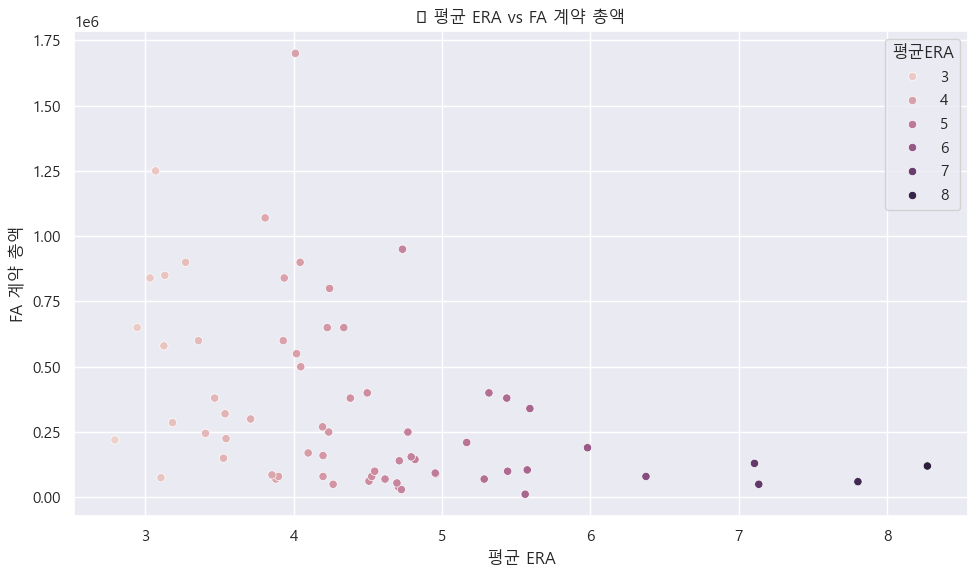

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_era, x='평균ERA', y='FA 계약 총액', hue='평균ERA')
plt.title('📊 평균 ERA vs FA 계약 총액')
plt.xlabel('평균 ERA')
plt.ylabel('FA 계약 총액')
plt.grid(True)
plt.tight_layout()
plt.show()

- 막대그래프

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\908528026.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_era = result_era.groupby('ERA구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\908528026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_era, x='ERA구간', y='FA 계약 총액', palette='crest')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\908528026.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from f

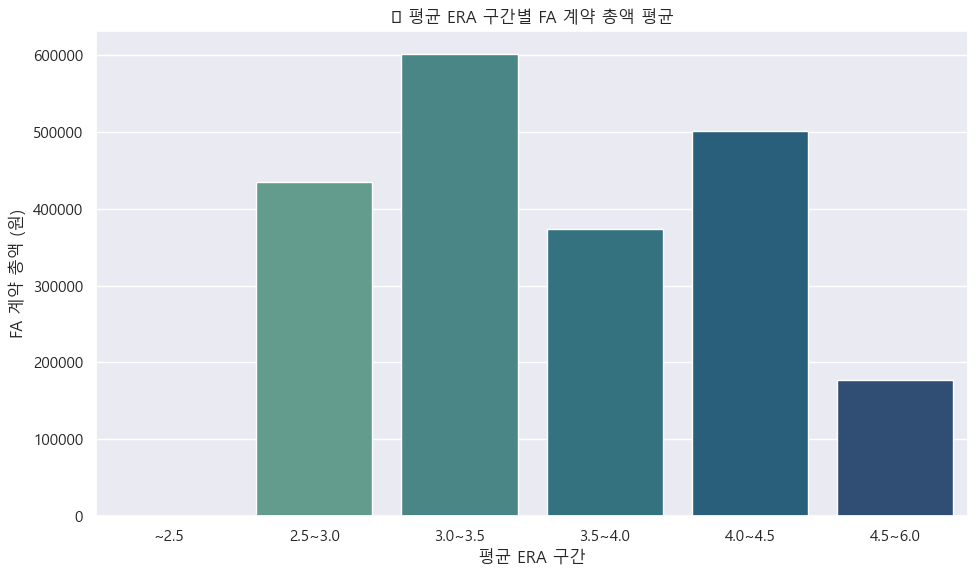

In [121]:
# 1. ERA 구간 설정
bins = [0, 2.5, 3.0, 3.5, 4.0, 4.5, 6.0]
labels = ['~2.5', '2.5~3.0', '3.0~3.5', '3.5~4.0', '4.0~4.5', '4.5~6.0']
result_era['ERA구간'] = pd.cut(result_era['평균ERA'], bins=bins, labels=labels, right=False)

# 2. ERA 구간별 계약 총액 평균 계산
grouped_era = result_era.groupby('ERA구간')['FA 계약 총액'].mean().reset_index()

# 3. 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_era, x='ERA구간', y='FA 계약 총액', palette='crest')
plt.title('📊 평균 ERA 구간별 FA 계약 총액 평균')
plt.xlabel('평균 ERA 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [125]:
result_era['ERA구간'].value_counts().sort_index()

ERA구간
~2.5        0
2.5~3.0     2
3.0~3.5    10
3.5~4.0    10
4.0~4.5    15
4.5~6.0    23
Name: count, dtype: int64

In [123]:
correlation_era = result_era[['평균ERA', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 ERA와 계약 총액의 상관계수: {correlation_era:.3f}')

📌 평균 ERA와 계약 총액의 상관계수: -0.407


## WAR VS 계약금액

In [134]:
# 1. 선수별 평균 WAR 계산
war_mean = df1.groupby('선수명')['종합 WAR'].mean().reset_index()
war_mean.rename(columns={'종합 WAR': '평균 WAR'}, inplace=True)

# 2. FA 계약 연수 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합 (선수명 기준)
result_war = pd.merge(fa_contract, war_mean, on='선수명', how='left')

# 4. 중복 제거
result_war = result_war.drop_duplicates(subset='선수명')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1637327257.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


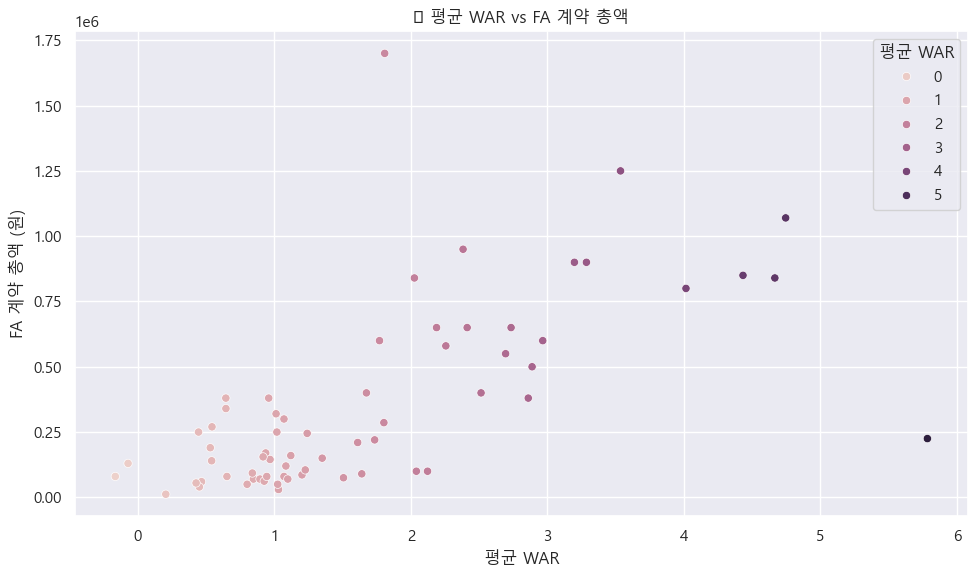

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_war, x='평균 WAR', y='FA 계약 총액', hue='평균 WAR')
plt.title('📊 평균 WAR vs FA 계약 총액')
plt.xlabel('평균 WAR')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\573495177.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_war = result_war.groupby('WAR 구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\573495177.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_war, x='WAR 구간', y='FA 계약 총액', palette='crest')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\573495177.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from

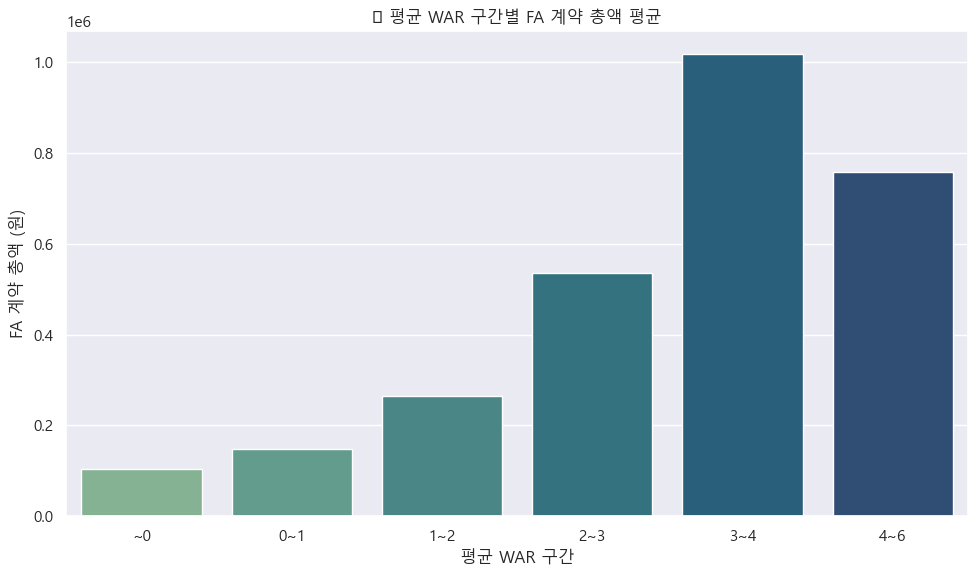

In [142]:
# WAR 구간 나누기
bins = [-2, 0, 1, 2, 3, 4, 6]
labels = ['~0', '0~1', '1~2', '2~3', '3~4', '4~6']
result_war['WAR 구간'] = pd.cut(result_war['평균 WAR'], bins=bins, labels=labels, right=False)

# 구간별 계약 총액 평균 계산
grouped_war = result_war.groupby('WAR 구간')['FA 계약 총액'].mean().reset_index()

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_war, x='WAR 구간', y='FA 계약 총액', palette='crest')
plt.title('📊 평균 WAR 구간별 FA 계약 총액 평균')
plt.xlabel('평균 WAR 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [146]:
correlation_war = result_war[['평균 WAR', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 WAR와 계약 총액의 상관계수: {correlation_war:.3f}')

📌 평균 WAR와 계약 총액의 상관계수: 0.645


In [156]:
result_war['WAR 구간'].value_counts().sort_index()

WAR 구간
~0      2
0~1    21
1~2    21
2~3    13
3~4     3
4~6     5
Name: count, dtype: int64

## 탈삼진 VS 계약총액

In [159]:
# 1. 선수별 평균 탈삼진 계산
strikeout_mean = df1.groupby('선수명')['탈삼진'].mean().reset_index()
strikeout_mean.rename(columns={'탈삼진': '평균탈삼진'}, inplace=True)

# 2. 계약 연수가 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합
result_so = pd.merge(fa_contract, strikeout_mean, on='선수명', how='left')
result_so = result_so.drop_duplicates(subset='선수명')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1267575899.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


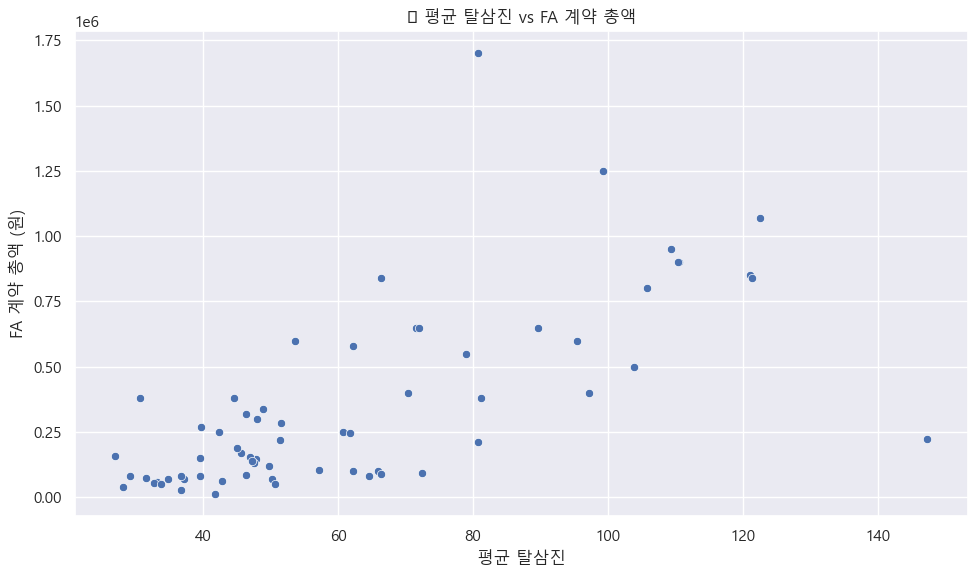

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_so, x='평균탈삼진', y='FA 계약 총액')
plt.title('📊 평균 탈삼진 vs FA 계약 총액')
plt.xlabel('평균 탈삼진')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2897807262.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_so = result_so.groupby('탈삼진구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2897807262.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_so, x='탈삼진구간', y='FA 계약 총액', palette='viridis')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2897807262.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

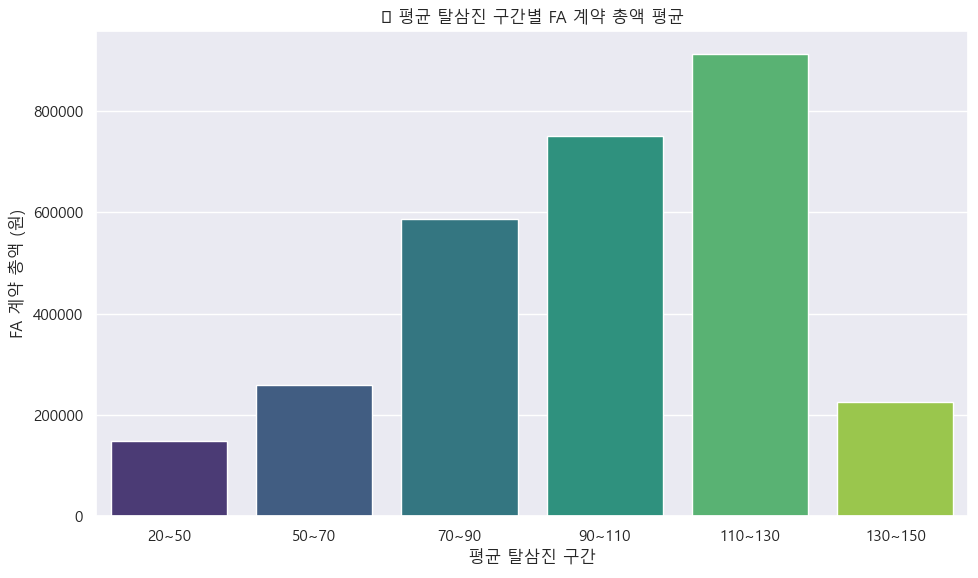

In [170]:
bins = [20, 50, 70, 90, 110, 130, 150]
labels = ['20~50','50~70','70~90','90~110','110~130','130~150']
result_so['탈삼진구간'] = pd.cut(result_so['평균탈삼진'], bins=bins, labels=labels, right=False)
grouped_so = result_so.groupby('탈삼진구간')['FA 계약 총액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_so, x='탈삼진구간', y='FA 계약 총액', palette='viridis')
plt.title('📊 평균 탈삼진 구간별 FA 계약 총액 평균')
plt.xlabel('평균 탈삼진 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [172]:
correlation_so = result_so[['평균탈삼진', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 탈삼진과 계약 총액의 상관계수: {correlation_so:.3f}')

📌 평균 탈삼진과 계약 총액의 상관계수: 0.681


## FIP VS 계약총액

In [174]:
# 1. 선수별 평균 FIP 계산
fip_mean = df1.groupby('선수명')['FIP'].mean().reset_index()
fip_mean.rename(columns={'FIP': '평균FIP'}, inplace=True)

# 2. 계약 연수가 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합
result_fip = pd.merge(fa_contract, fip_mean, on='선수명', how='left')
result_fip = result_fip.drop_duplicates(subset='선수명')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2949262069.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


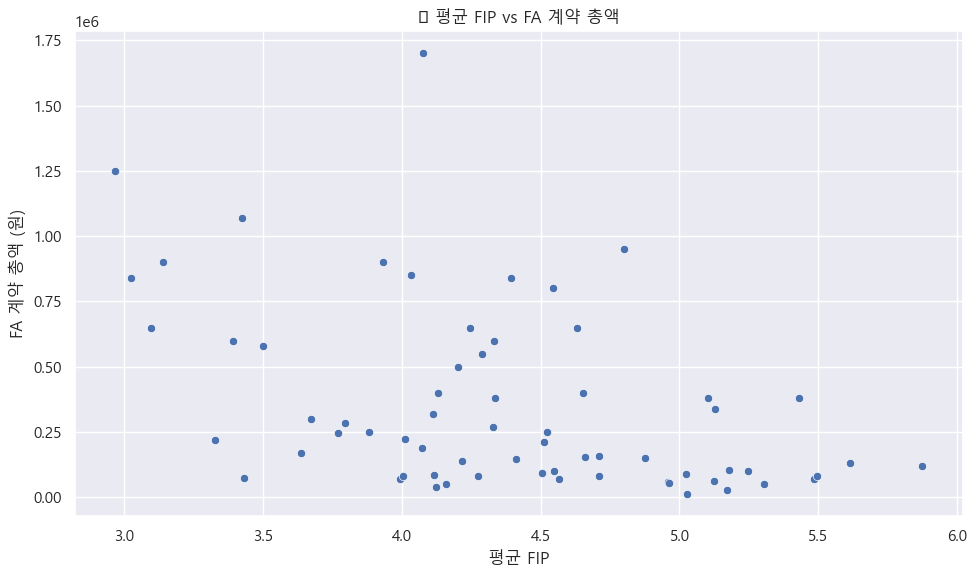

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_fip, x='평균FIP', y='FA 계약 총액')
plt.title('📊 평균 FIP vs FA 계약 총액')
plt.xlabel('평균 FIP')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\4119245631.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fip = result_fip.groupby('FIP구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\4119245631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_fip, x='FIP구간', y='FA 계약 총액', palette='magma')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\4119245631.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from

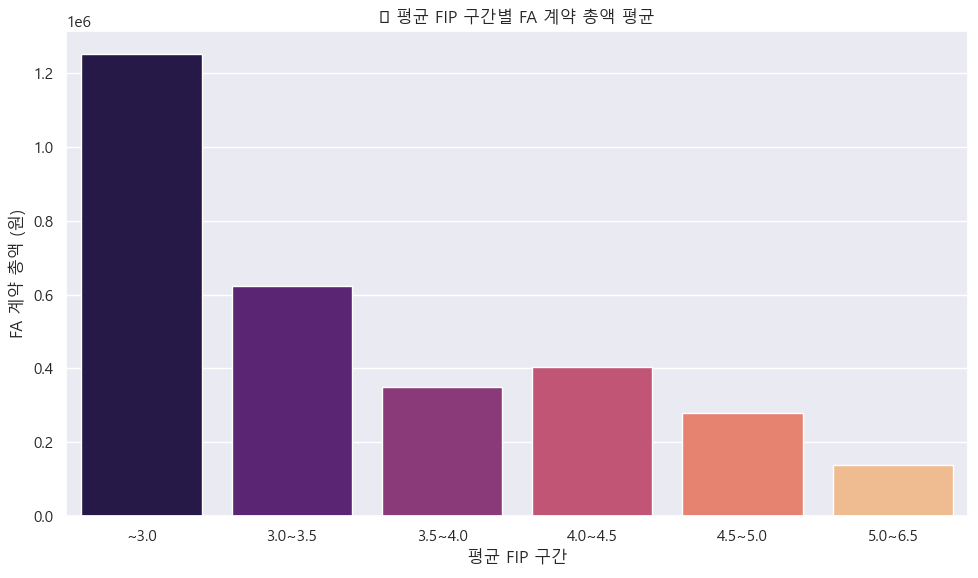

In [179]:
bins = [0, 3.0, 3.5, 4.0, 4.5, 5.0, 6.5]
labels = ['~3.0','3.0~3.5','3.5~4.0','4.0~4.5','4.5~5.0','5.0~6.5']
result_fip['FIP구간'] = pd.cut(result_fip['평균FIP'], bins=bins, labels=labels, right=False)
grouped_fip = result_fip.groupby('FIP구간')['FA 계약 총액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_fip, x='FIP구간', y='FA 계약 총액', palette='magma')
plt.title('📊 평균 FIP 구간별 FA 계약 총액 평균')
plt.xlabel('평균 FIP 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [181]:
correlation_fip = result_fip[['평균FIP', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 FIP와 계약 총액의 상관계수: {correlation_fip:.3f}')

📌 평균 FIP와 계약 총액의 상관계수: -0.455


## 피장타율 vs 계약총액

In [183]:
# 1. 선수별 평균 피장타율 계산
slg_mean = df1.groupby('선수명')['피장타율'].mean().reset_index()
slg_mean.rename(columns={'피장타율': '평균피장타율'}, inplace=True)

# 2. FA 계약 연수가 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합
result_slg = pd.merge(fa_contract, slg_mean, on='선수명', how='left')
result_slg = result_slg.drop_duplicates(subset='선수명')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3734860221.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


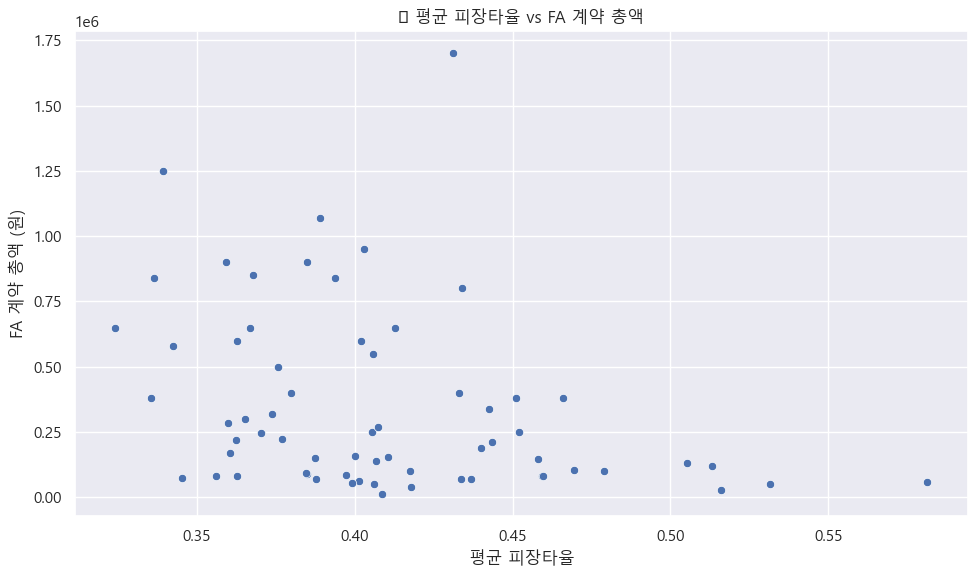

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_slg, x='평균피장타율', y='FA 계약 총액')
plt.title('📊 평균 피장타율 vs FA 계약 총액')
plt.xlabel('평균 피장타율')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\501210751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_slg = result_slg.groupby('피장타율구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\501210751.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_slg, x='피장타율구간', y='FA 계약 총액', palette='rocket')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\501210751.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from

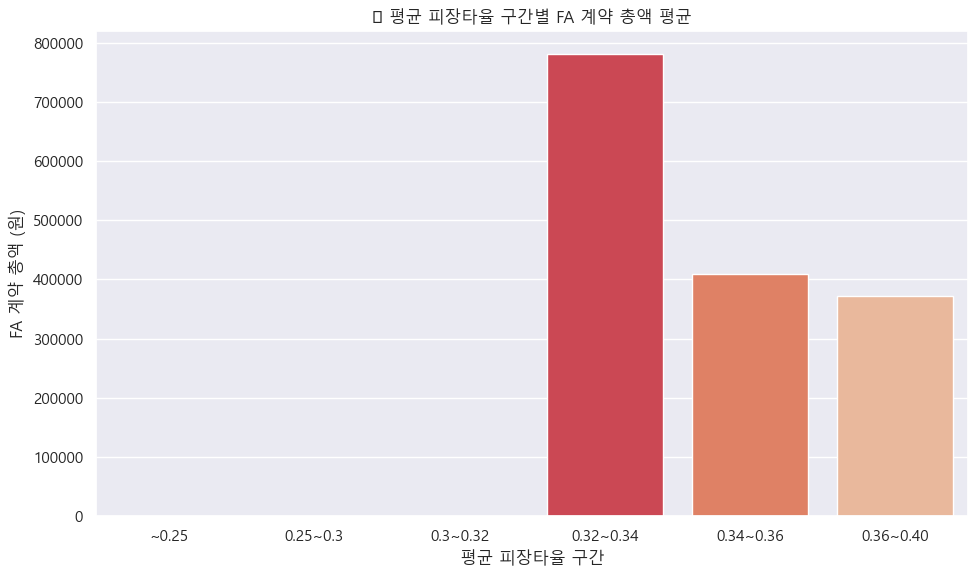

In [187]:
bins = [0, 0.25, 0.3, 0.32, 0.34, 0.36, 0.40]
labels = ['~0.25','0.25~0.3','0.3~0.32','0.32~0.34','0.34~0.36','0.36~0.40']
result_slg['피장타율구간'] = pd.cut(result_slg['평균피장타율'], bins=bins, labels=labels, right=False)
grouped_slg = result_slg.groupby('피장타율구간')['FA 계약 총액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_slg, x='피장타율구간', y='FA 계약 총액', palette='rocket')
plt.title('📊 평균 피장타율 구간별 FA 계약 총액 평균')
plt.xlabel('평균 피장타율 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [189]:
correlation_slg = result_slg[['평균피장타율', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 피장타율과 계약 총액의 상관계수: {correlation_slg:.3f}')

📌 평균 피장타율과 계약 총액의 상관계수: -0.330


## 볼넷허용 VS 계약금액

In [193]:
# 1. 선수별 평균 볼넷허용 계산
bb_mean = df1.groupby('선수명')['볼넷허용'].mean().reset_index()
bb_mean.rename(columns={'볼넷허용': '평균볼넷허용'}, inplace=True)

# 2. 계약 연수가 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']]

# 3. 병합
result_bb = pd.merge(fa_contract, bb_mean, on='선수명', how='left')
result_bb = result_bb.drop_duplicates(subset='선수명')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\912754017.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


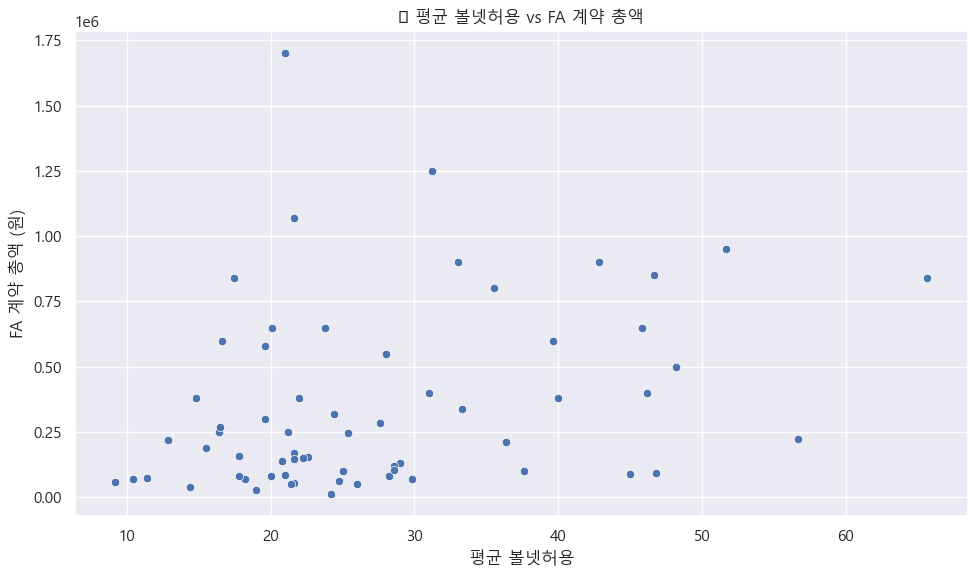

In [195]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_bb, x='평균볼넷허용', y='FA 계약 총액')
plt.title('📊 평균 볼넷허용 vs FA 계약 총액')
plt.xlabel('평균 볼넷허용')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3237249431.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bb = result_bb.groupby('볼넷허용구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3237249431.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_bb, x='볼넷허용구간', y='FA 계약 총액', palette='coolwarm')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3237249431.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing fr

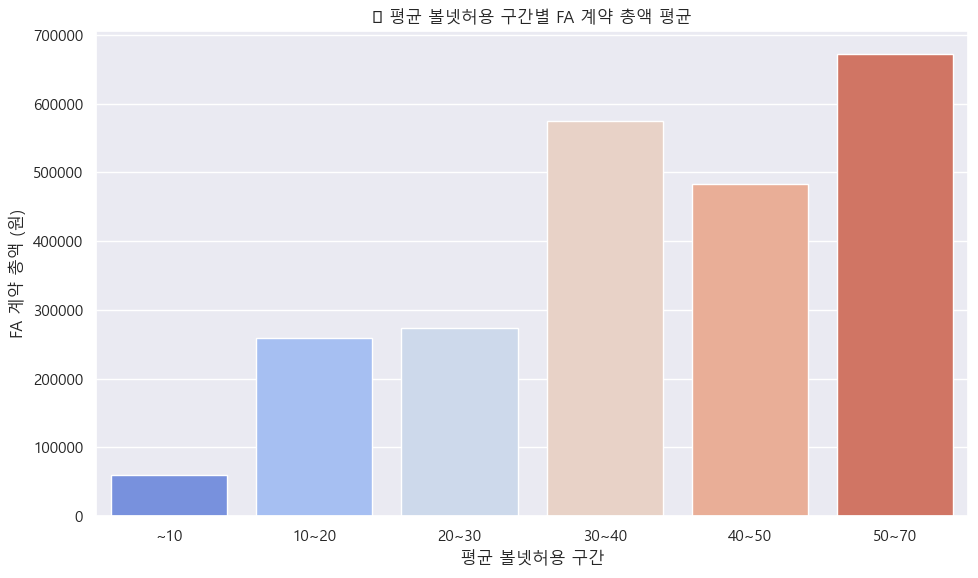

In [199]:
# 5. 볼넷허용 구간 나누기
bins = [0, 10, 20, 30, 40, 50, 70]
labels = ['~10','10~20','20~30','30~40','40~50','50~70']
result_bb['볼넷허용구간'] = pd.cut(result_bb['평균볼넷허용'], bins=bins, labels=labels, right=False)
grouped_bb = result_bb.groupby('볼넷허용구간')['FA 계약 총액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_bb, x='볼넷허용구간', y='FA 계약 총액', palette='coolwarm')
plt.title('📊 평균 볼넷허용 구간별 FA 계약 총액 평균')
plt.xlabel('평균 볼넷허용 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [201]:
correlation_bb = result_bb[['평균볼넷허용', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 볼넷허용과 계약 총액의 상관계수: {correlation_bb:.3f}')

📌 평균 볼넷허용과 계약 총액의 상관계수: 0.304


---

## 평균 FIP와 평균 연봉

In [208]:
# 1. 선수별 평균 연봉 계산
salary_mean = df1.groupby('선수명')['연봉'].mean().reset_index()
salary_mean.rename(columns={'연봉': '평균연봉'}, inplace=True)

# 2. 예: 평균 FIP와 병합
fip_mean = df1.groupby('선수명')['FIP'].mean().reset_index()
fip_mean.rename(columns={'FIP': '평균FIP'}, inplace=True)

# 3. 병합 (선수명 기준)
result_salary_fip = pd.merge(salary_mean, fip_mean, on='선수명', how='inner')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\609548864.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


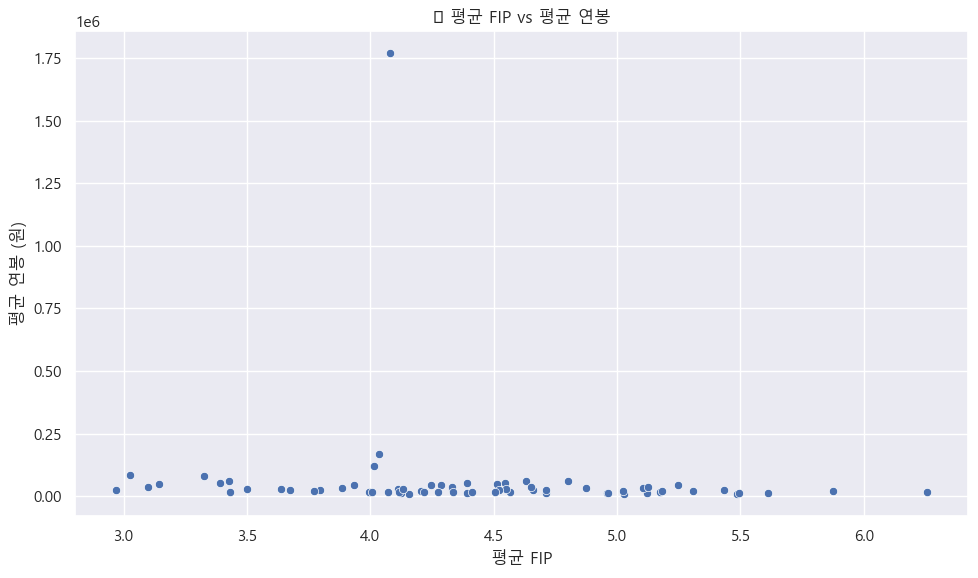

In [210]:
# 4. 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_salary_fip, x='평균FIP', y='평균연봉')
plt.title('📊 평균 FIP vs 평균 연봉')
plt.xlabel('평균 FIP')
plt.ylabel('평균 연봉 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1099795917.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_salary_fip.groupby('FIP구간')['평균연봉'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1099795917.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='FIP구간', y='평균연봉', palette='magma')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1099795917.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) 

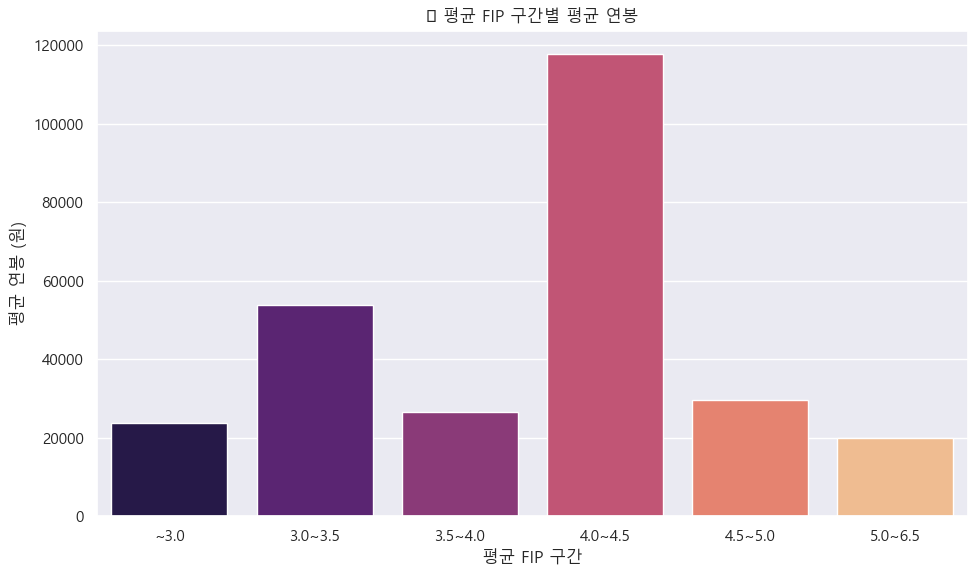

In [214]:
# 5. 구간 나눠 막대그래프
bins = [0, 3.0, 3.5, 4.0, 4.5, 5.0, 6.5]
labels = ['~3.0','3.0~3.5','3.5~4.0','4.0~4.5','4.5~5.0','5.0~6.5']
result_salary_fip['FIP구간'] = pd.cut(result_salary_fip['평균FIP'], bins=bins, labels=labels, right=False)
grouped = result_salary_fip.groupby('FIP구간')['평균연봉'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='FIP구간', y='평균연봉', palette='magma')
plt.title('📊 평균 FIP 구간별 평균 연봉')
plt.xlabel('평균 FIP 구간')
plt.ylabel('평균 연봉 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [216]:
corr = result_salary_fip[['평균FIP', '평균연봉']].corr().iloc[0, 1]
print(f'📌 평균 FIP와 평균 연봉의 상관계수: {corr:.3f}')

📌 평균 FIP와 평균 연봉의 상관계수: -0.096


## 평균 WAR과 평균 연봉

In [221]:
# 1. 선수별 평균 연봉 계산
salary_mean = df1.groupby('선수명')['연봉'].mean().reset_index()
salary_mean.rename(columns={'연봉': '평균연봉'}, inplace=True)

# 2. 선수별 평균 WAR 계산
war_mean = df1.groupby('선수명')['종합 WAR'].mean().reset_index()
war_mean.rename(columns={'종합 WAR': '평균WAR'}, inplace=True)

# 3. 병합
result_salary_war = pd.merge(salary_mean, war_mean, on='선수명', how='inner')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\630955995.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


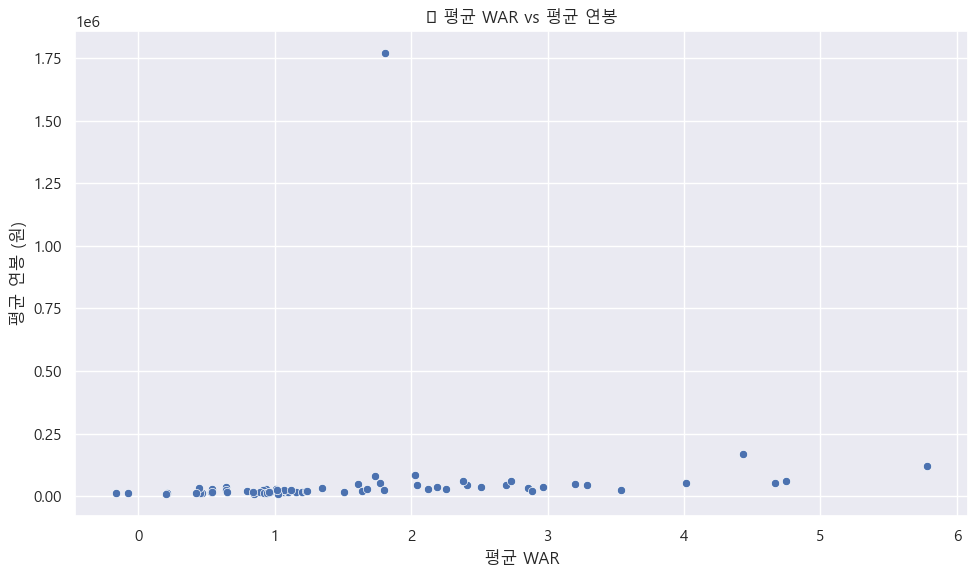

In [223]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_salary_war, x='평균WAR', y='평균연봉')
plt.title('📊 평균 WAR vs 평균 연봉')
plt.xlabel('평균 WAR')
plt.ylabel('평균 연봉 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2011804333.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_salary_war.groupby('WAR구간')['평균연봉'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2011804333.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='WAR구간', y='평균연봉', palette='crest')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2011804333.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) 

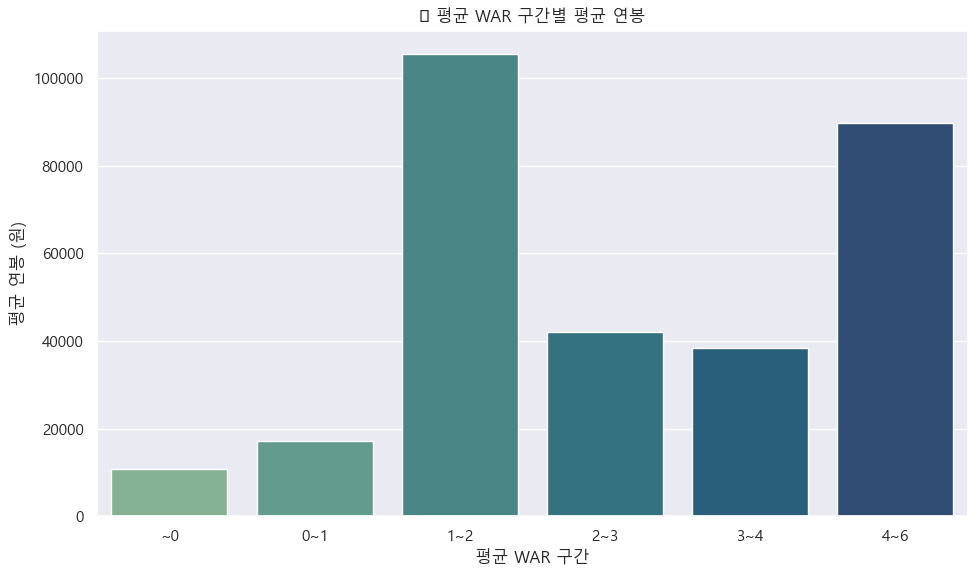

In [225]:
# 5. WAR 구간 나눠서 막대그래프
bins = [-2, 0, 1, 2, 3, 4, 6]
labels = ['~0', '0~1', '1~2', '2~3', '3~4', '4~6']
result_salary_war['WAR구간'] = pd.cut(result_salary_war['평균WAR'], bins=bins, labels=labels, right=False)

grouped = result_salary_war.groupby('WAR구간')['평균연봉'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='WAR구간', y='평균연봉', palette='crest')
plt.title('📊 평균 WAR 구간별 평균 연봉')
plt.xlabel('평균 WAR 구간')
plt.ylabel('평균 연봉 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [227]:
correlation = result_salary_war[['평균WAR', '평균연봉']].corr().iloc[0, 1]
print(f'📌 평균 WAR과 평균 연봉의 상관계수: {correlation:.3f}')

📌 평균 WAR과 평균 연봉의 상관계수: 0.105


## 투 VS 계약금액

In [269]:
# 1. 우언 / 우사 → 우투로 통합
df1['투정리'] = df1['투'].replace({'우언': '우투', '우사': '우투'})

# 2. FA 계약 연수가 있는 행만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액', '투정리']]

# 3. 중복 제거 (선수 기준)
fa_contract = fa_contract.drop_duplicates(subset='선수명')

# 4. 그룹별 평균 계약 총액 계산
grouped_pitch = fa_contract.groupby('투정리')['FA 계약 총액'].mean().reset_index()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2394823187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_pitch, x='투정리', y='FA 계약 총액', palette='pastel')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\2394823187.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


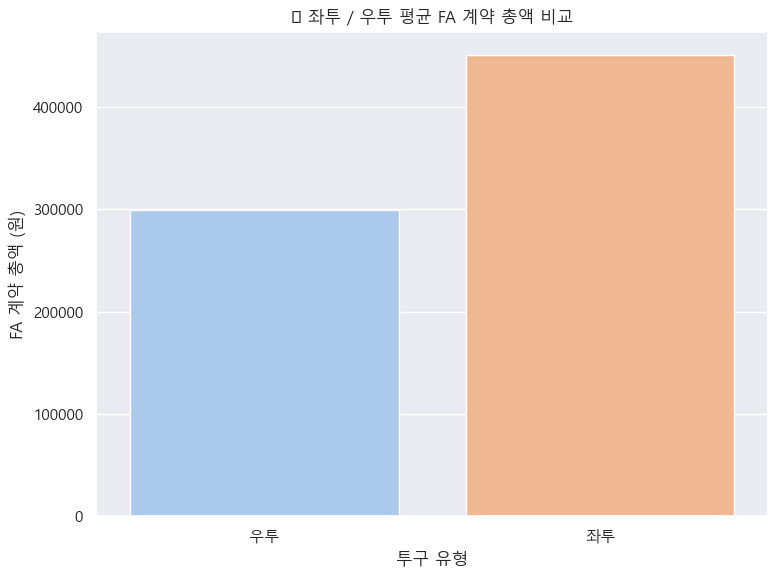

In [271]:
# 5. 막대그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_pitch, x='투정리', y='FA 계약 총액', palette='pastel')
plt.title('📊 좌투 / 우투 평균 FA 계약 총액 비교')
plt.xlabel('투구 유형')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [272]:
# 투정리 숫자로 변환 (우투:0, 좌투:1)
fa_contract['투정리_코드'] = fa_contract['투정리'].map({'우투': 0, '좌투': 1})

# 상관계수 계산
correlation = fa_contract[['투정리_코드', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 좌/우투 (0=우, 1=좌) 와 계약 총액 간 상관계수: {correlation:.3f}')

📌 좌/우투 (0=우, 1=좌) 와 계약 총액 간 상관계수: 0.206


## 세부 포지션 VS 계약금액

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3231697274.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_position, x='세부 포지션', y='FA 계약 총액', palette='Set2')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3231697274.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


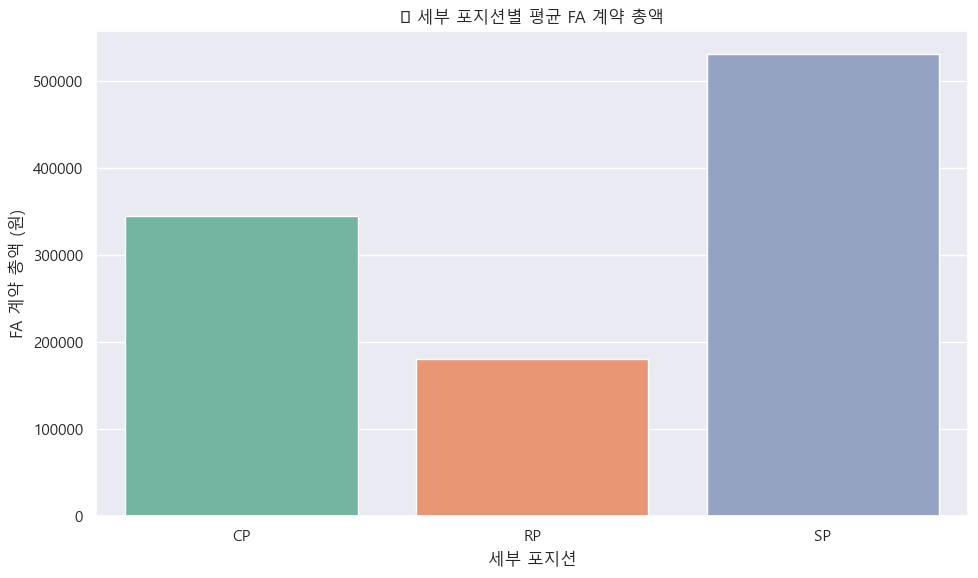

In [236]:
# 1. FA 계약 연수가 있는 행만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액', '세부 포지션']]

# 2. 선수 기준 중복 제거
fa_contract = fa_contract.drop_duplicates(subset='선수명')

# 3. 세부 포지션별 평균 계약 금액 계산
grouped_position = fa_contract.groupby('세부 포지션')['FA 계약 총액'].mean().reset_index()

# 4. 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_position, x='세부 포지션', y='FA 계약 총액', palette='Set2')
plt.title('📊 세부 포지션별 평균 FA 계약 총액')
plt.xlabel('세부 포지션')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 원클럽맨여부 VS 계약총액

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1184952480.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_oneclub, x='원클럽맨여부', y='FA 계약 총액', palette='Blues')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1184952480.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


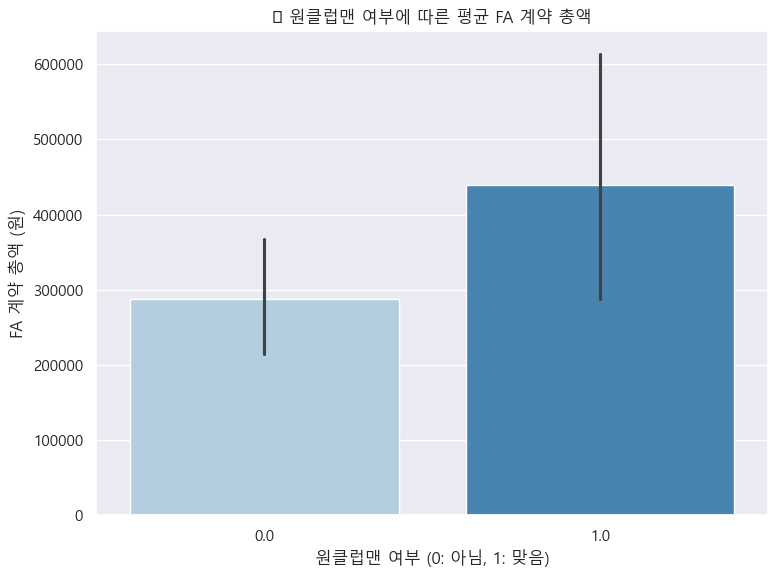

In [239]:
# 1. 선수별 원클럽맨 여부 → 최대값으로 하나로 통일
oneclubman = df1.groupby('선수명')['원클럽맨여부'].max().reset_index()

# 2. FA 계약 연수가 있는 선수만 추출
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']].drop_duplicates(subset='선수명')

# 3. 병합
result_oneclub = pd.merge(fa_contract, oneclubman, on='선수명', how='left')

# 4. 막대그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=result_oneclub, x='원클럽맨여부', y='FA 계약 총액', palette='Blues')
plt.title('📊 원클럽맨 여부에 따른 평균 FA 계약 총액')
plt.xlabel('원클럽맨 여부 (0: 아님, 1: 맞음)')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## 평균 투구수 vs FA 계약총액

In [242]:
# 1. 선수별 평균 투구수 계산
pitch_mean = df1.groupby('선수명')['투구수'].mean().reset_index()
pitch_mean.rename(columns={'투구수': '평균투구수'}, inplace=True)

# 2. FA 계약 총액 가져오기 (선수 기준 중복 제거)
fa_contract = df1[df1['FA 계약 연수'] > 0][['선수명', 'FA 계약 총액']].drop_duplicates(subset='선수명')

# 3. 병합
result_pitch_fa = pd.merge(fa_contract, pitch_mean, on='선수명', how='left')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\1195866699.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


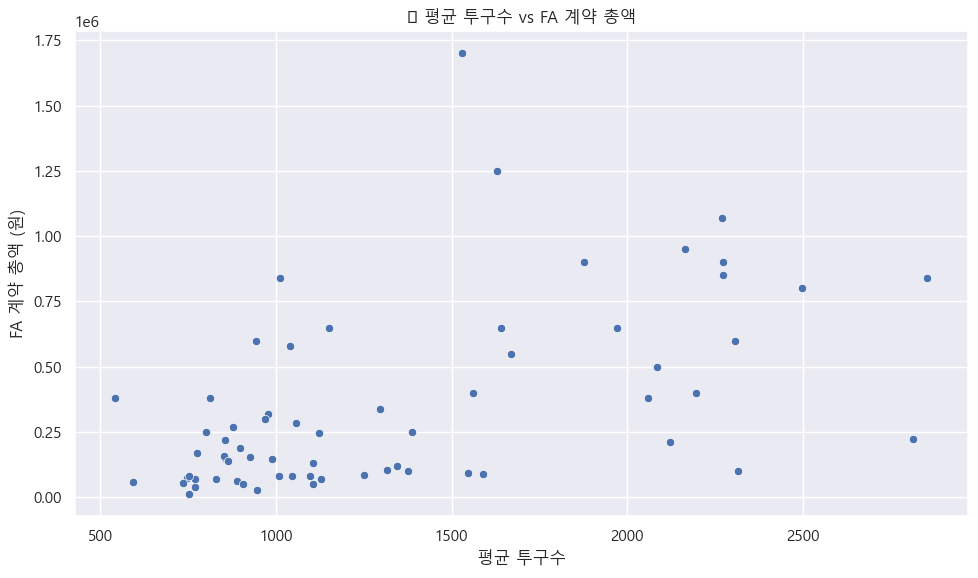

In [244]:
# 4. 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_pitch_fa, x='평균투구수', y='FA 계약 총액')
plt.title('📊 평균 투구수 vs FA 계약 총액')
plt.xlabel('평균 투구수')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\win11\AppData\Local\Temp\ipykernel_22604\280740616.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fa = result_pitch_fa.groupby('투구수구간')['FA 계약 총액'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\280740616.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_fa, x='투구수구간', y='FA 계약 총액', palette='viridis')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\280740616.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing fr

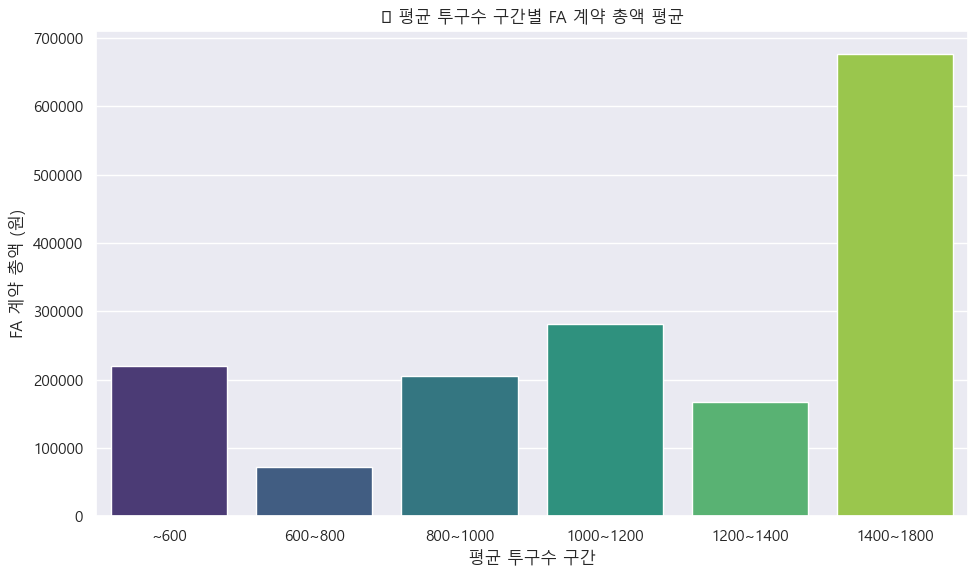

In [246]:
# 5. 구간 나눠 막대그래프
bins = [0, 600, 800, 1000, 1200, 1400, 1800]
labels = ['~600', '600~800', '800~1000', '1000~1200', '1200~1400', '1400~1800']
result_pitch_fa['투구수구간'] = pd.cut(result_pitch_fa['평균투구수'], bins=bins, labels=labels, right=False)
grouped_fa = result_pitch_fa.groupby('투구수구간')['FA 계약 총액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_fa, x='투구수구간', y='FA 계약 총액', palette='viridis')
plt.title('📊 평균 투구수 구간별 FA 계약 총액 평균')
plt.xlabel('평균 투구수 구간')
plt.ylabel('FA 계약 총액 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [248]:
corr_fa = result_pitch_fa[['평균투구수', 'FA 계약 총액']].corr().iloc[0, 1]
print(f'📌 평균 투구수와 계약 총액의 상관계수: {corr_fa:.3f}')

📌 평균 투구수와 계약 총액의 상관계수: 0.528


## 평균 투구수 vs 평균 연봉

In [251]:
# 1. 선수별 평균 연봉
salary_mean = df1.groupby('선수명')['연봉'].mean().reset_index()
salary_mean.rename(columns={'연봉': '평균연봉'}, inplace=True)

# 2. 병합 (평균 투구수와 평균 연봉)
result_pitch_salary = pd.merge(salary_mean, pitch_mean, on='선수명', how='inner')

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\371054769.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


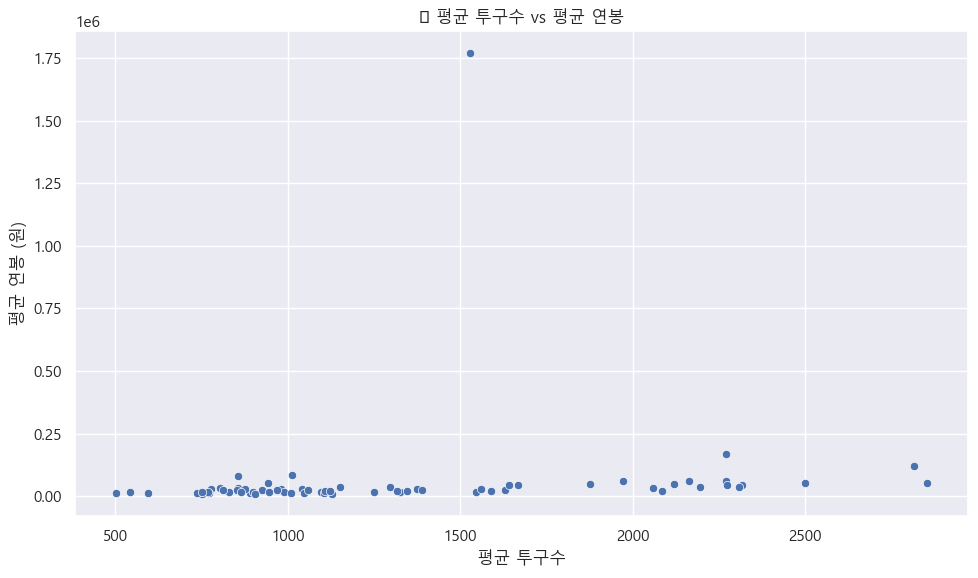

In [253]:
# 3. 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_pitch_salary, x='평균투구수', y='평균연봉')
plt.title('📊 평균 투구수 vs 평균 연봉')
plt.xlabel('평균 투구수')
plt.ylabel('평균 연봉 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3570303730.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_salary = result_pitch_salary.groupby('투구수구간')['평균연봉'].mean().reset_index()
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3570303730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_salary, x='투구수구간', y='평균연봉', palette='rocket')
C:\Users\win11\AppData\Local\Temp\ipykernel_22604\3570303730.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) miss

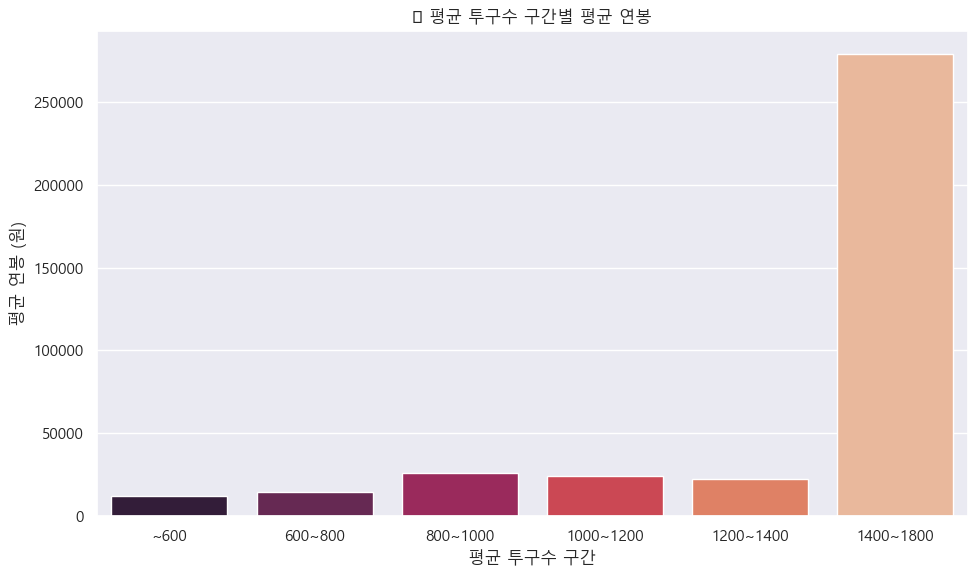

In [255]:
# 4. 구간 나눠 막대그래프
result_pitch_salary['투구수구간'] = pd.cut(result_pitch_salary['평균투구수'], bins=bins, labels=labels, right=False)
grouped_salary = result_pitch_salary.groupby('투구수구간')['평균연봉'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_salary, x='투구수구간', y='평균연봉', palette='rocket')
plt.title('📊 평균 투구수 구간별 평균 연봉')
plt.xlabel('평균 투구수 구간')
plt.ylabel('평균 연봉 (원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [257]:
corr_salary = result_pitch_salary[['평균투구수', '평균연봉']].corr().iloc[0, 1]
print(f'📌 평균 투구수와 평균 연봉의 상관계수: {corr_salary:.3f}')

📌 평균 투구수와 평균 연봉의 상관계수: 0.114


---

### 1차

#### - 투수 계약금 vs 평균 이닝 
- 던지는 이닝이 많아질수록, 계약금이 높다 / 상관관계 : 0.551
#### - 투수 계약금 vs 평균 자책점(ERA) 
- 평균 자책점의 그래프가 왔다갔다 하지만.. 낮으면 계약금 높다. / 상관관계 : -0.407
#### - 투수 계약금 vs 종합 WAR 평균
- WAR이 높아질수록 계약금이 높다 / 상관관계 : 0.645
#### - 투수 계약금 vs 평균 탈삼진
- 삼진을 많이 잡을수록 계약금 높다 / 상관관계 : 0.681
#### - 투수 계약금 vs 평균 FIP
- FIP가 낮을수록 계약금이 높다 / 상관관계 : -0.455
#### - 투수 계약금 vs 평균 피안타율
- 피장타율이 낮을수록 계약금이 높다 / 상관관계 : -0.33
#### - 투수 계약금 vs 평균 볼넷허용
- 이상하다. 볼넷허용이 많아도 계약금이 높다 / 상관관계 : 0.304
#### - 투수 계약금 vs 투
- 좌투이면 계약금이 높다 
#### - 투수 계약금 vs 포지션
- SP - CP - RP 순서로 계약금이 높다.
#### - 투수 계약금 vs 원클럽맨
- 원클럽맨일수록 계약금이 높다
#### - 투수 계약금 vs 평균 투구수
- 평균 투구수가 높아질수록 계약금이 높다. / 상관계수 : 0.528

In [283]:
df1['FA 계약 총액'].isna().sum()

0